# Stock Price Prediction for HDFCBANK.NS using ARIMA & SARIMA

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# Download historical stock price for HDFCBANK.NS
df = yf.download("HDFCBANK.NS", start="2018-01-01", end="2024-12-31")
df = df[['Close']]
df.dropna(inplace=True)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,HDFCBANK.NS
Date,
2018-01-01,869.462280
2018-01-02,877.830994
2018-01-03,868.594910
2018-01-04,871.994019
2018-01-05,873.728638


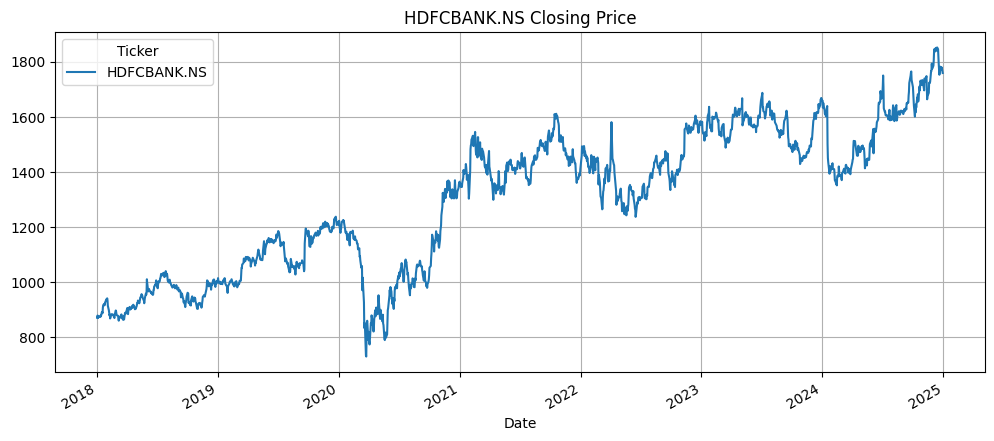

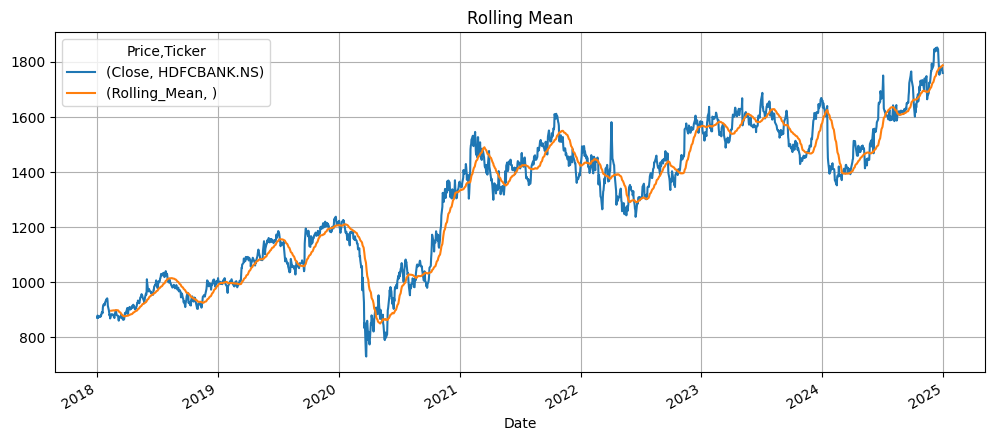

In [3]:
# Plot closing prices
df['Close'].plot(figsize=(12, 5), title="HDFCBANK.NS Closing Price")
plt.grid()
plt.show()

# Rolling statistics
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Rolling_Mean']].plot(figsize=(12, 5), title="Rolling Mean")
plt.grid()
plt.show()


In [4]:
# Augmented Dickey-Fuller test
result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.3952846060683883
p-value: 0.5845346382071597


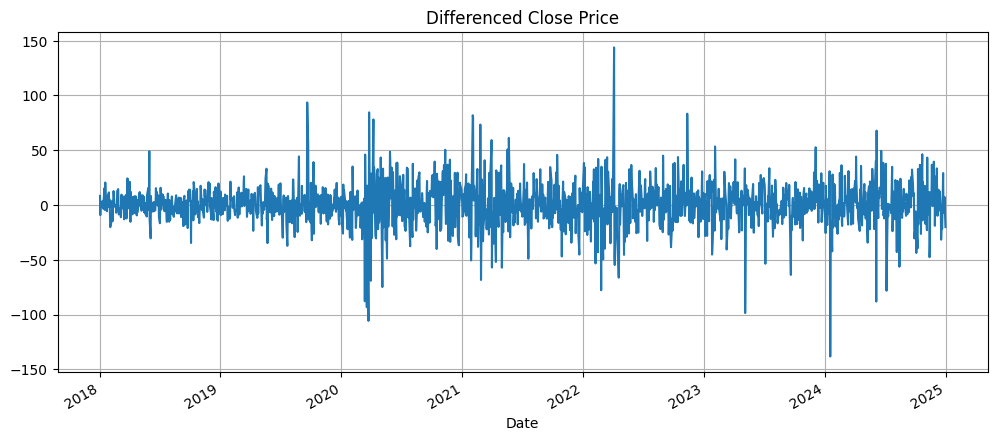

In [5]:
# First order differencing
df['Close_diff'] = df['Close'].diff().dropna()
df['Close_diff'].dropna().plot(title="Differenced Close Price", figsize=(12,5))
plt.grid()
plt.show()


In [6]:
# Train-test split
train = df['Close'][:-90]
test = df['Close'][-90:]


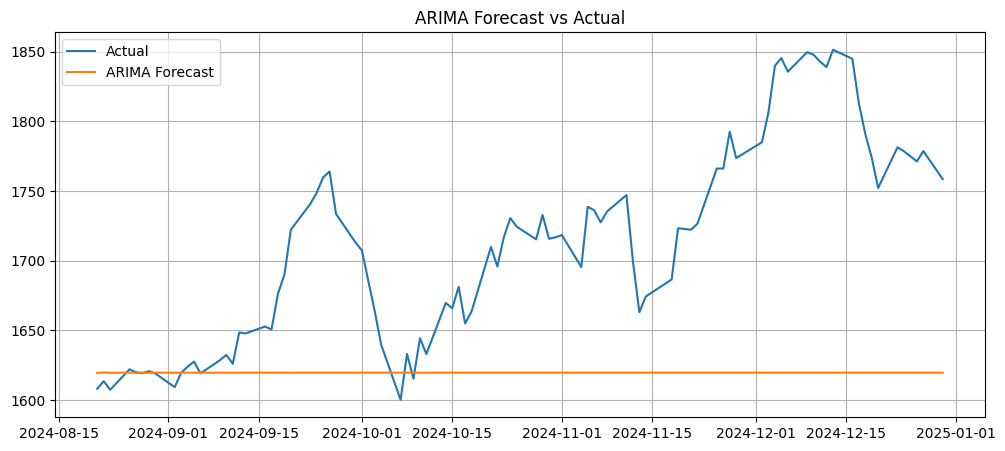

In [7]:
# Fit ARIMA model (p=1,d=1,q=1 as an example)
model_arima = ARIMA(train, order=(1,1,1))
model_arima_fit = model_arima.fit()
arima_pred = model_arima_fit.forecast(steps=90)

# Plot results
plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_pred, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.grid()
plt.show()


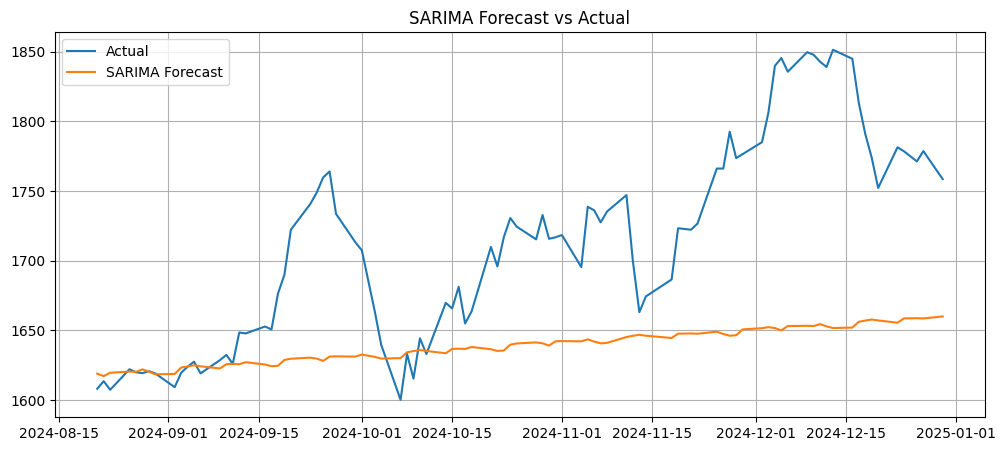

In [8]:
# SARIMA (p,d,q)x(P,D,Q,s)
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
sarima_pred = model_sarima_fit.forecast(steps=90)

# Plot SARIMA
plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_pred, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.grid()
plt.show()


In [9]:
def evaluate(y_true, y_pred, name="Model"):
    print(f"{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("-" * 30)

evaluate(test, arima_pred, "ARIMA")
evaluate(test, sarima_pred, "SARIMA")


ARIMA Evaluation:
MAE: 93.51
RMSE: 116.64
------------------------------
SARIMA Evaluation:
MAE: 75.37
RMSE: 95.92
------------------------------
